<a href="https://colab.research.google.com/github/prabhkaur301/ML-notebooks/blob/main/malicious_url_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install sklearn==0.0.post1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=028a15cf92c4de17e10c3ee0b7a83f076110fb103628f56bb785eb487f32f2e7
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [32]:
url_dataset=pd.read_csv('/content/drive/MyDrive/Major project/Malicious Url Detector/urldata.csv')

In [33]:
url_dataset

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


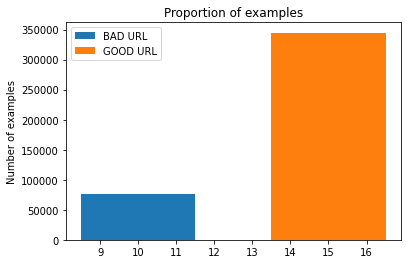

In [6]:
%matplotlib inline
BAD_len = url_dataset[url_dataset['label'] == 'bad'].shape[0]
GOOD_len = url_dataset[url_dataset['label'] == 'good'].shape[0]
plt.bar(10,BAD_len,3, label='BAD URL')
plt.bar(15,GOOD_len,3, label='GOOD URL')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

## Removal of null values

In [34]:
url_dataset['url'].isna().sum()
url_dataset['label'].isna().sum()

0

In [35]:
url_dataset= url_dataset[pd.notnull(url_dataset['url'])]

## Label to numerical category

In [36]:
url_dataset['category_id'] = url_dataset['label'].factorize()[0]
category_id_df = url_dataset[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [37]:
url_dataset

,url,label,category_id
0,diaryofagameaddict.com,bad,0
1,espdesign.com.au,bad,0
2,iamagameaddict.com,bad,0
3,kalantzis.net,bad,0
4,slightlyoffcenter.net,bad,0
...,...,...,...
420459,23.227.196.215/,bad,0
420460,apple-checker.org/,bad,0
420461,apple-iclods.org/,bad,0
420462,apple-uptoday.org/,bad,0


## Shuffled Dataset

In [38]:
url_dataset = url_dataset.sample(frac = 1)

In [ ]:
url_dataset

,url,label,category_id
32713,hlynge.dk/new/DHL/,bad,0
62733,cityroom.blogs.nytimes.com/author/dan-bilefsky/,good,1
328175,rockmnation.com/section/mizzou-football-2010,good,1
375232,youtube.com/watch?v=5G3xhMxTb_U,good,1
360235,usa-people-search.com/Find-J-Cooper-Novato-CA-...,good,1
...,...,...,...
95552,funky16corners.tripod.com/earland_discography.htm,good,1
274337,last.fm/music/Black+Ox+Orkestar/_/Bukharian,good,1
302010,mylifetime.com/movies/too-rich-the-secret-life...,good,1
405738,maggycocoa.net/i9uje,bad,0


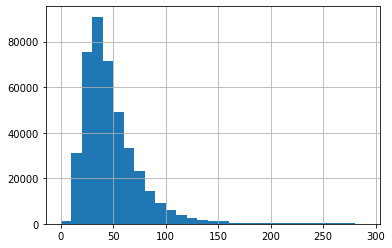

In [12]:
%matplotlib inline
lens = url_dataset.url.str.len()
lens.hist(bins = np.arange(0,300,10))

# Custom Tokeniser

In [42]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/') # make tokens after splitting by slash
    total_Tokens = []

    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []

    for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
            total_Tokens = total_Tokens + tokens + tkns_ByDot
            total_Tokens = list(set(total_Tokens))  #remove redundant tokens

    if 'com' in total_Tokens:
        total_Tokens.remove('com') # removing .com since it occurs a lot of times and it should not be included in our features
 
    return total_Tokens

In [44]:
url_list = url_dataset["url"]
y = url_dataset["label"]

In [46]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [47]:
X = vectorizer.fit_transform(url_list)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [51]:
randfor = RandomForestClassifier(max_depth=14, random_state=2022) 
randfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=2022)

In [52]:
label_pred_randfor = randfor.predict(X_test)
print(classification_report(y_test, label_pred_randfor))
print("accuracy: {}%".format(round(accuracy_score(y_test, label_pred_randfor)*100,2)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00     14833
        good       0.82      1.00      0.90     69260

    accuracy                           0.82     84093
   macro avg       0.41      0.50      0.45     84093
weighted avg       0.68      0.82      0.74     84093

accuracy: 82.36%


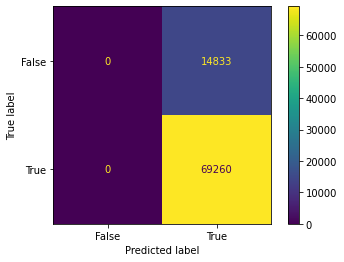

In [54]:
confusion_matrix_rd = confusion_matrix(y_test, label_pred_randfor)
cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rd, display_labels = [False, True])
cm_display.plot()
plt.show() 

# Custom tokeniser ended

In [39]:
# converting to all lowercase
url_dataset['url'] = url_dataset['url'].apply(lambda x: x.lower())
url_dataset.head()

,url,label,category_id
254326,healthgrades.com/physician/dr-amy-cyr-xqnr5/,good,1
205975,census-online.us/view/gauthier/,good,1
238436,fanbase.com/kansas-city-royals-1999,good,1
354987,tributes.com/show/james-edward-york-85045161,good,1
67073,dallascommandery.org/mkt.htm,good,1


In [14]:
url_dataset['url'] = url_dataset['url'].str.replace('.com', '')

<ipython-input-14-7c0cf912ba23>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  url_dataset['url'] = url_dataset['url'].str.replace('.com', '')


In [ ]:
url_dataset

,url,label,category_id
32713,hlynge.dk/new/dhl/,bad,0
62733,cityroom.blogs.nytimes/author/dan-bilefsky/,good,1
328175,rockmnation/section/mizzou-football-2010,good,1
375232,youtube/watch?v=5g3xhmxtb_u,good,1
360235,usa-people-search/find-j-cooper-novato-ca-9494...,good,1
...,...,...,...
95552,funky16corners.tripod/earland_discography.htm,good,1
274337,last.fm/music/black+ox+orkestar/_/bukharian,good,1
302010,mylifetime/movies/too-rich-the-secret-life-of-...,good,1
405738,maggycocoa.net/i9uje,bad,0


## Spacy Library for Word Embedding

In [15]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg", disable=['ner', 'parser'])

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [17]:
url_dataset["url_vec"]=url_dataset["url"].apply(lambda url: nlp(url).vector)
url_dataset

,url,label,category_id,url_vec
83427,en.wikipedia.org/wiki/pierre_falardeau,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
140440,saddle-creek/store/445,good,1,"[-2.3341, 0.75559986, 2.20588, 2.2581859, 1.62..."
331110,sarodibartolo.it/phl-bikes.htm,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15800,etiketa.br/.webmail-verify/,bad,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
135624,profs.etsmtl.ca/pbourque/accueil/en/main.shtml,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
366787,wellness/dir/1493808/dentist/ma/pittsfield/joh...,good,1,"[-1.600216, -0.79201084, 3.1615515, 2.4998097,..."
115214,marketplace.news.yahoo.net/saepio-technologies...,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
209559,civista.org/blog/index.php/2010/02/civista-at-...,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
51839,baseball.wikia/wiki/2005_major_league_baseball...,good,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [18]:
url_dataset.to_csv('/content/drive/MyDrive/Major project/Malicious Url Detector/processed_data.csv')

In [ ]:
url_train,url_test, label_train, label_test = train_test_split(url_dataset.url_vec.values, url_dataset.category_id, test_size=0.2, random_state=2022)

In [22]:
url_train_2D = np.stack(url_train)
url_test_2D = np.stack(url_test)

Random Forest

In [23]:
randfor = RandomForestClassifier(max_depth=14, random_state=2022) 
randfor.fit(url_train_2D, label_train)

RandomForestClassifier(max_depth=14, random_state=2022)

In [25]:
label_pred_randfor = randfor.predict(url_test_2D)
print(classification_report(label_test, label_pred_randfor))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_randfor)*100,2)))

              precision    recall  f1-score   support

           0       0.95      0.19      0.31     14987
           1       0.85      1.00      0.92     69106

    accuracy                           0.85     84093
   macro avg       0.90      0.59      0.62     84093
weighted avg       0.87      0.85      0.81     84093

accuracy: 85.34%


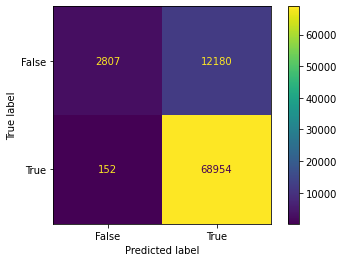

In [26]:
confusion_matrix_rd = confusion_matrix(label_test, label_pred_randfor)
cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rd, display_labels = [False, True])
cm_display.plot()
plt.show() 

Saving pkl file of model

In [27]:
# loading library
import pickle

In [28]:
# create an iterator object with write permission - model.pkl
with open('random_forest_model.pkl', 'wb') as files:
    pickle.dump(randfor, files)


Details of dependency used

In [29]:
!pip install session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=3e724d69ce4d4a330ffd1e6976641930f06039da329e437f429ac9f411ab1971
  Stored in directory: /root/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [30]:
import session_info
session_info.show()